# Question 1

In [2]:
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt

In [3]:
anscombe = np.load('anscombe.npy')

In [4]:
def q1(X,Y):

    slope, intercept, r, pval, stderr = stats.linregress(X, Y)
    print('Mean X: ', np.mean(X))
    print('Mean Y: ', np.mean(Y),'\n')
    print('Var X:  ', np.var(X))
    print('Var Y:  ', np.var(Y),'\n')
    print('Slope:  ', slope)
    print('Intercept: ', intercept)
    
    return slope, intercept


_________________
 SECTION # 1
Mean X:  9.0
Mean Y:  7.500909090909093 

Var X:   10.0
Var Y:   3.7520628099173554 

Slope:   0.5000909090909091
Intercept:  3.0000909090909103
_________________
 SECTION # 2
Mean X:  9.0
Mean Y:  7.50090909090909 

Var X:   10.0
Var Y:   3.752390082644628 

Slope:   0.5000000000000001
Intercept:  3.000909090909089
_________________
 SECTION # 3
Mean X:  9.0
Mean Y:  7.5 

Var X:   10.0
Var Y:   3.747836363636364 

Slope:   0.4997272727272729
Intercept:  3.002454545454544
_________________
 SECTION # 4
Mean X:  9.0
Mean Y:  7.500909090909091 

Var X:   10.0
Var Y:   3.7484082644628103 

Slope:   0.4999090909090909
Intercept:  3.0017272727272726


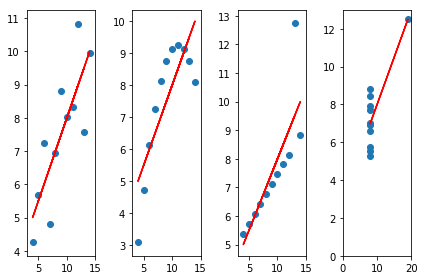

In [5]:
fig, axes = plt.subplots(1,4)
for i in range(4):
    
    X = anscombe[:,2*i].ravel()
    Y = anscombe[:,2*i+1].ravel()
    
    print('_________________\n','SECTION #', i+1)
    slope, intercept = q1(X,Y)
    
    axes[i].plot(X, intercept + slope*X, 'r')
    axes[i].scatter(X,Y)

plt.axis([0, 20, 0, 13])
plt.tight_layout()

Each section is highly similar to each other in mean,varince. 

But each is distributed quite differently

# Question 2

In [6]:
def bernstein(x, v, n):
    b = special.binom(n,v) * (x ** v) * (1 - x) ** (n - v)
    return b

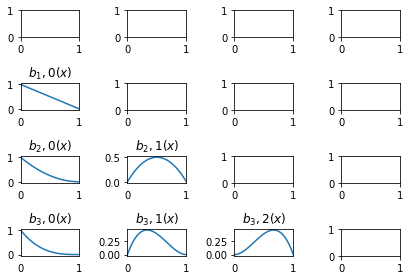

In [7]:
fig, axes = plt.subplots(4,4)
xDomain = np.linspace(0,1,100)

for n in range(4):
    for v in range(n):

        y = bernstein(xDomain,v,n)
        axes[n,v].plot(xDomain,y)
        axes[n,v].tick_params(labelcolor='k', top=False, bottom=False, left=True, right=False)
        axes[n,v].set_title(r"$b_{},{}(x)$".format(n,v))
        axes[n,v].set_xlim(0, 1)

plt.tight_layout()        

# Question 3

In [8]:
mlb = np.load("MLB.npy")
height = mlb[:,0]
weight = mlb[:,1]
age = mlb[:,2]

age.shape

(1033,)

Text(0,0.5,'Weight')

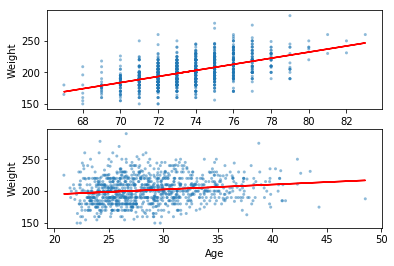

In [9]:
fig, axes = plt.subplots(2,1)

slope, intercept, r, pval, stderr = stats.linregress(height, weight)
axes[0].plot(height,intercept + slope*height,'r-')
axes[0].scatter(height,weight, alpha=0.5, edgecolor='none',marker='.')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Weight')

slope, intercept, r, pval, stderr = stats.linregress(age, weight)
yhat = intercept + slope * age
axes[1].plot(age,yhat,'r-')
axes[1].scatter(age,weight, alpha=0.5, edgecolor='none',marker='.')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Weight')


# Question 4

In [10]:
year, magnitude, longitude, latitude = np.load('earthquakes.npy').T

Text(0,0.5,'Quantity per year')

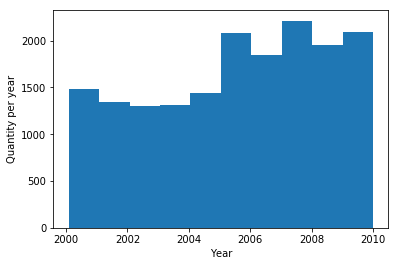

In [11]:
fig, ax = plt.subplots()
plt.hist(year,bins=10)
plt.xlabel("Year")
plt.ylabel("Quantity per year")

Text(0,0.5,'Frequncy')

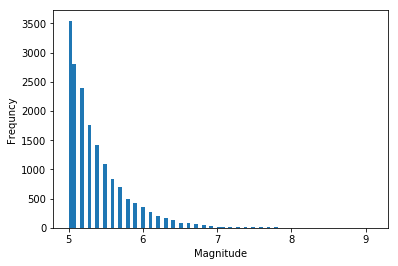

In [12]:
plt.hist(magnitude, bins=80)
plt.xlabel('Magnitude')
plt.ylabel('Frequncy')

(-198.00565663082432, 198.00965663082434, -74.8249266004415, 93.96192660044152)

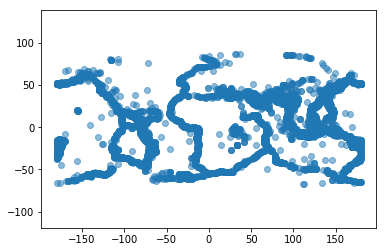

In [13]:
plt.scatter(longitude, latitude,alpha=0.5)
plt.axis('equal')
# strenght of earthquake?

# Question 5

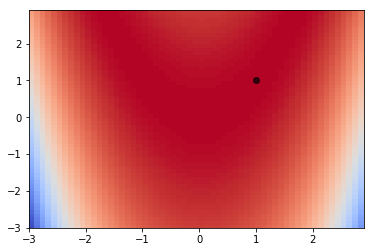

In [15]:
f = lambda x, y: (1 - x)**2 + 100 * (y - x**2)**2
min_x, max_x = -3, 3
x_grid = np.arange(min_x, max_x, 0.1)
x, y = np.meshgrid(x_grid, x_grid)

plt.pcolormesh(x, y, -f(x, y), cmap='coolwarm')
plt.scatter(1, 1, c='k', alpha=0.7)
plt.show()

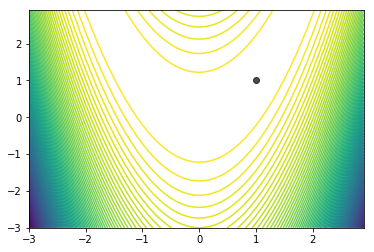

In [16]:
plt.contour(x, y, -f(x, y), 100, cmap='viridis')
plt.scatter(1, 1, c='k', alpha=0.7)
plt.show()

# Question 6

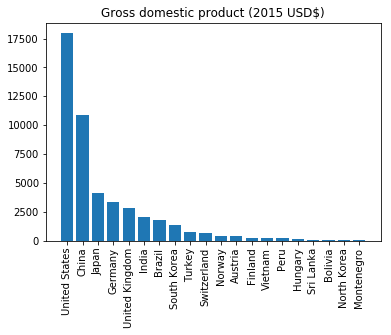

In [17]:
pop, gdp, mheight, fheight = np.load('countries.npy').T
countries = ["Austria", "Bolivia", "Brazil", "China",
            "Finland", "Germany", "Hungary", "India",
            "Japan", "North Korea", "Montenegro", "Norway",
            "Peru", "South Korea", "Sri Lanka", "Switzerland",
            "Turkey", "United Kingdom", "United States", "Vietnam"]
countries = np.array(countries)

by_gdp = np.argsort(gdp)[::-1]
plt.bar(range(len(countries)), gdp[by_gdp])
plt.xticks(range(len(countries)), countries[by_gdp], rotation=90)
plt.title('Gross domestic product (2015 USD$)')
plt.show()

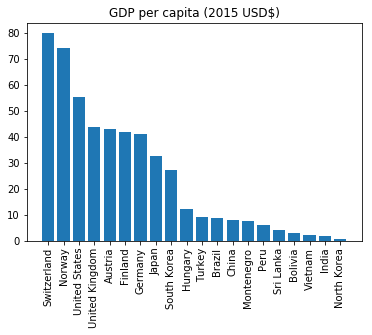

In [18]:
gdp_per_cap = gdp / pop
by_gdppc = np.argsort(gdp_per_cap)[::-1]
plt.bar(range(len(countries)), gdp_per_cap[by_gdppc])
plt.xticks(range(len(countries)), countries[by_gdppc], rotation=90)
plt.title('GDP per capita (2015 USD$)')
plt.show()

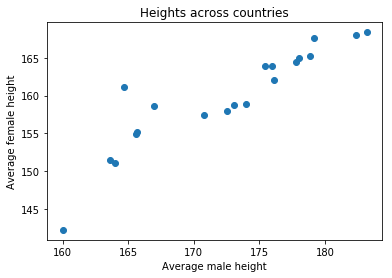

In [19]:
plt.scatter(mheight, fheight)
plt.xlabel('Average male height')
plt.ylabel('Average female height')
plt.title('Heights across countries')
plt.show()

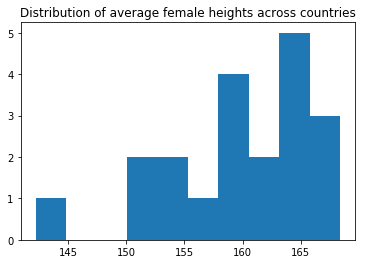

In [20]:
plt.hist(fheight, bins=10)
plt.title('Distribution of average female heights across countries')
plt.show()